In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [37]:
base_path = '../experiments/'

MODELS = {
    "resnet18": "ResNet18",
    "efficientnet": "EfficientNet B0",
    "densenet": "DenseNet 121",
}

SPLIT_OPTIONS = ["100%", "80%", "60%", "40%", "20%"]

DATASETS = {
    "edible-plants": "edible-plants",
    "food101": "food101",
    "marvel": "marvel",
    "plant-data": "plant-data",
    "stanford-dogs": "stanford-dogs",
}

fig_size = (30,16)
title_font=48
label_font=36
marker_size=22

plt.rcParams.update({'font.size': 32})

In [9]:
SCORES = []
for model in MODELS.keys():
    for dataset in DATASETS.keys():
        for data_split in SPLIT_OPTIONS:
            path = os.path.join('../models/evals', f"{model}-{dataset}-{data_split}.csv")
            res_df = pd.read_csv(path, names=['f1', 'acc'])        

            SCORES.append([dataset, model, data_split, float(res_df['acc']), float(res_df['f1'])])

In [14]:
scores_df = pd.DataFrame(np.array(SCORES), columns=['dataset', 'model', 'data_split', 'acc', 'f1'])
scores_df['acc'] = scores_df['acc'].map(lambda x: float(x))
scores_df['f1'] = scores_df['f1'].map(lambda x: float(x))

In [15]:
scores_df[scores_df['dataset'] == 'marvel']

,dataset,model,data_split,acc,f1
10,marvel,resnet18,100%,0.6813,0.6798
11,marvel,resnet18,80%,0.6935,0.6923
12,marvel,resnet18,60%,0.6759,0.6693
13,marvel,resnet18,40%,0.6361,0.6301
14,marvel,resnet18,20%,0.6017,0.5960
35,marvel,efficientnet,100%,0.7119,0.7041
36,marvel,efficientnet,80%,0.6918,0.6831
37,marvel,efficientnet,60%,0.6892,0.6856
38,marvel,efficientnet,40%,0.6493,0.6444
39,marvel,efficientnet,20%,0.5831,0.5774


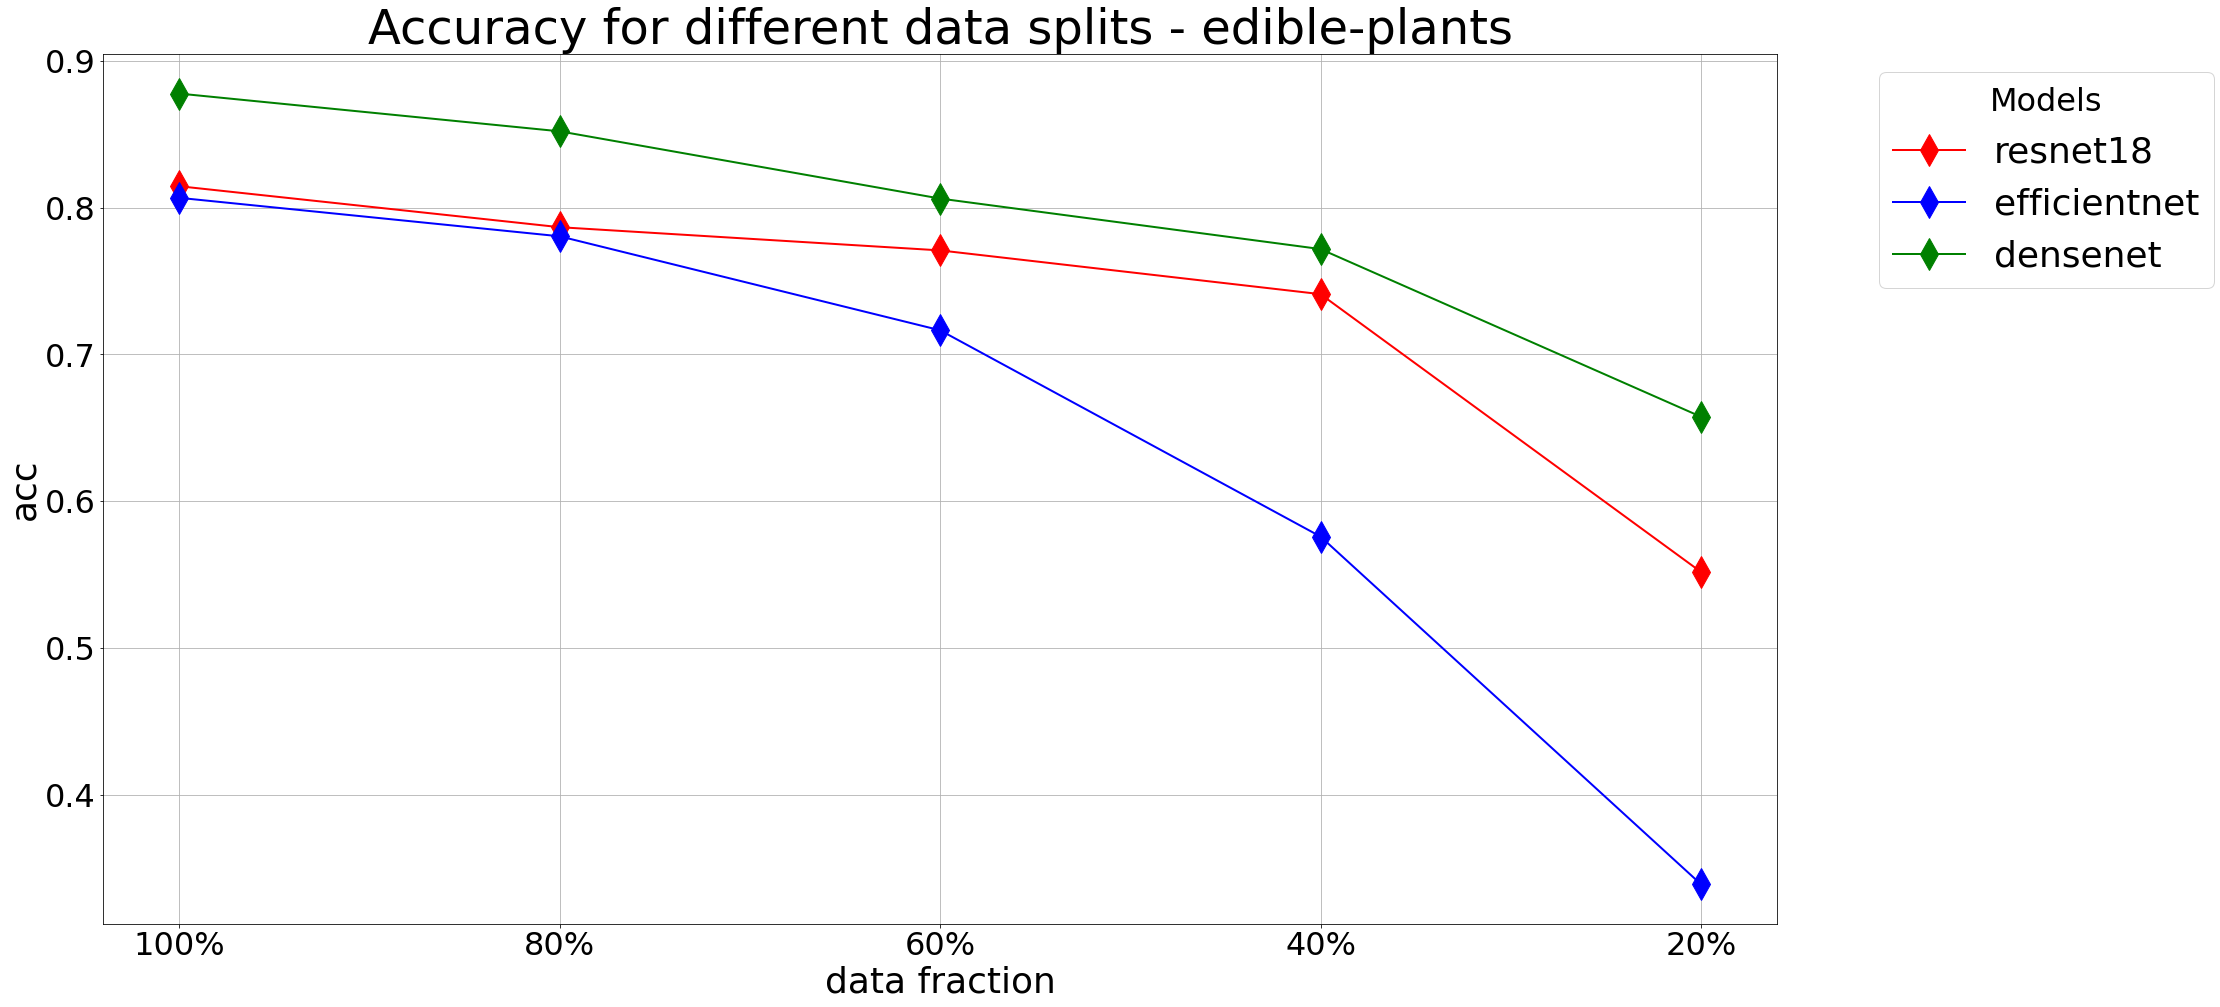

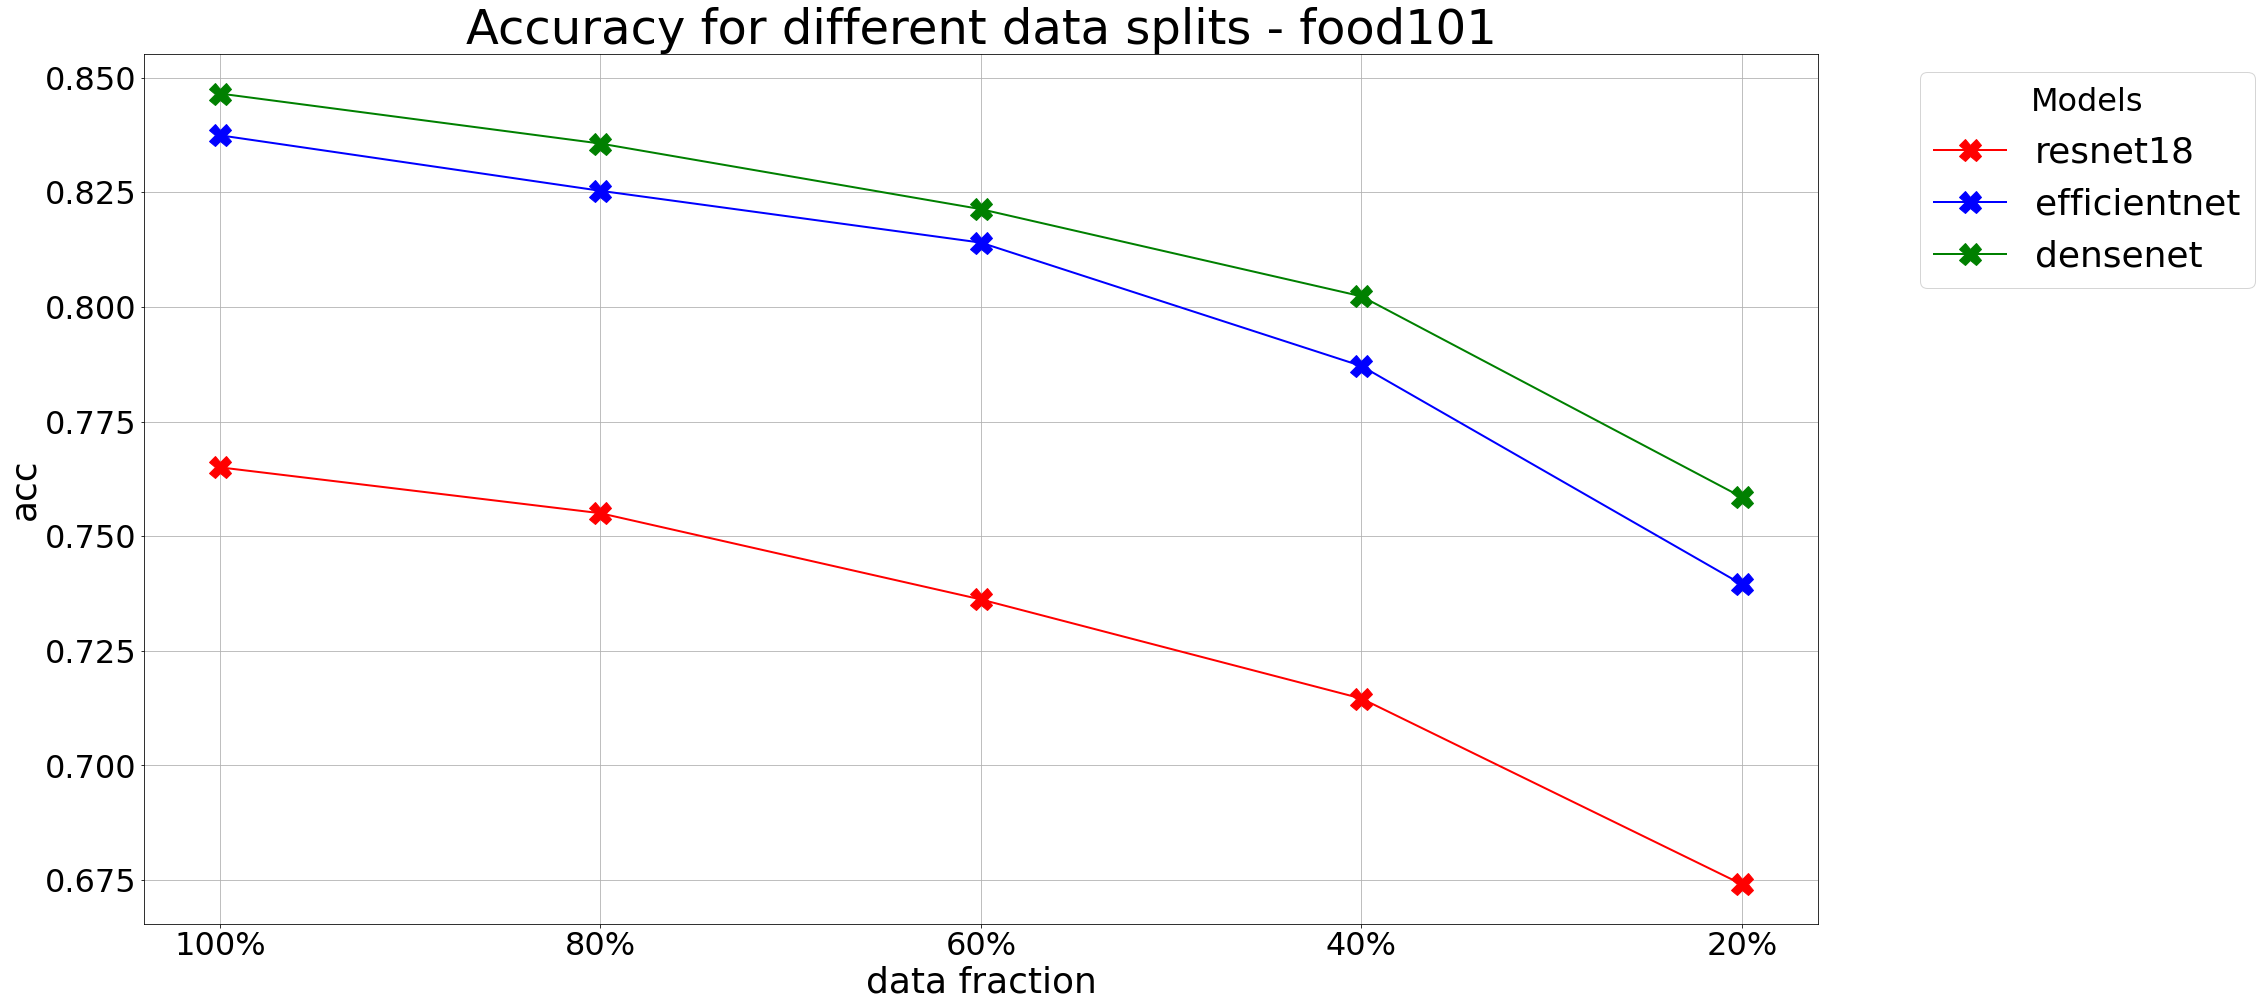

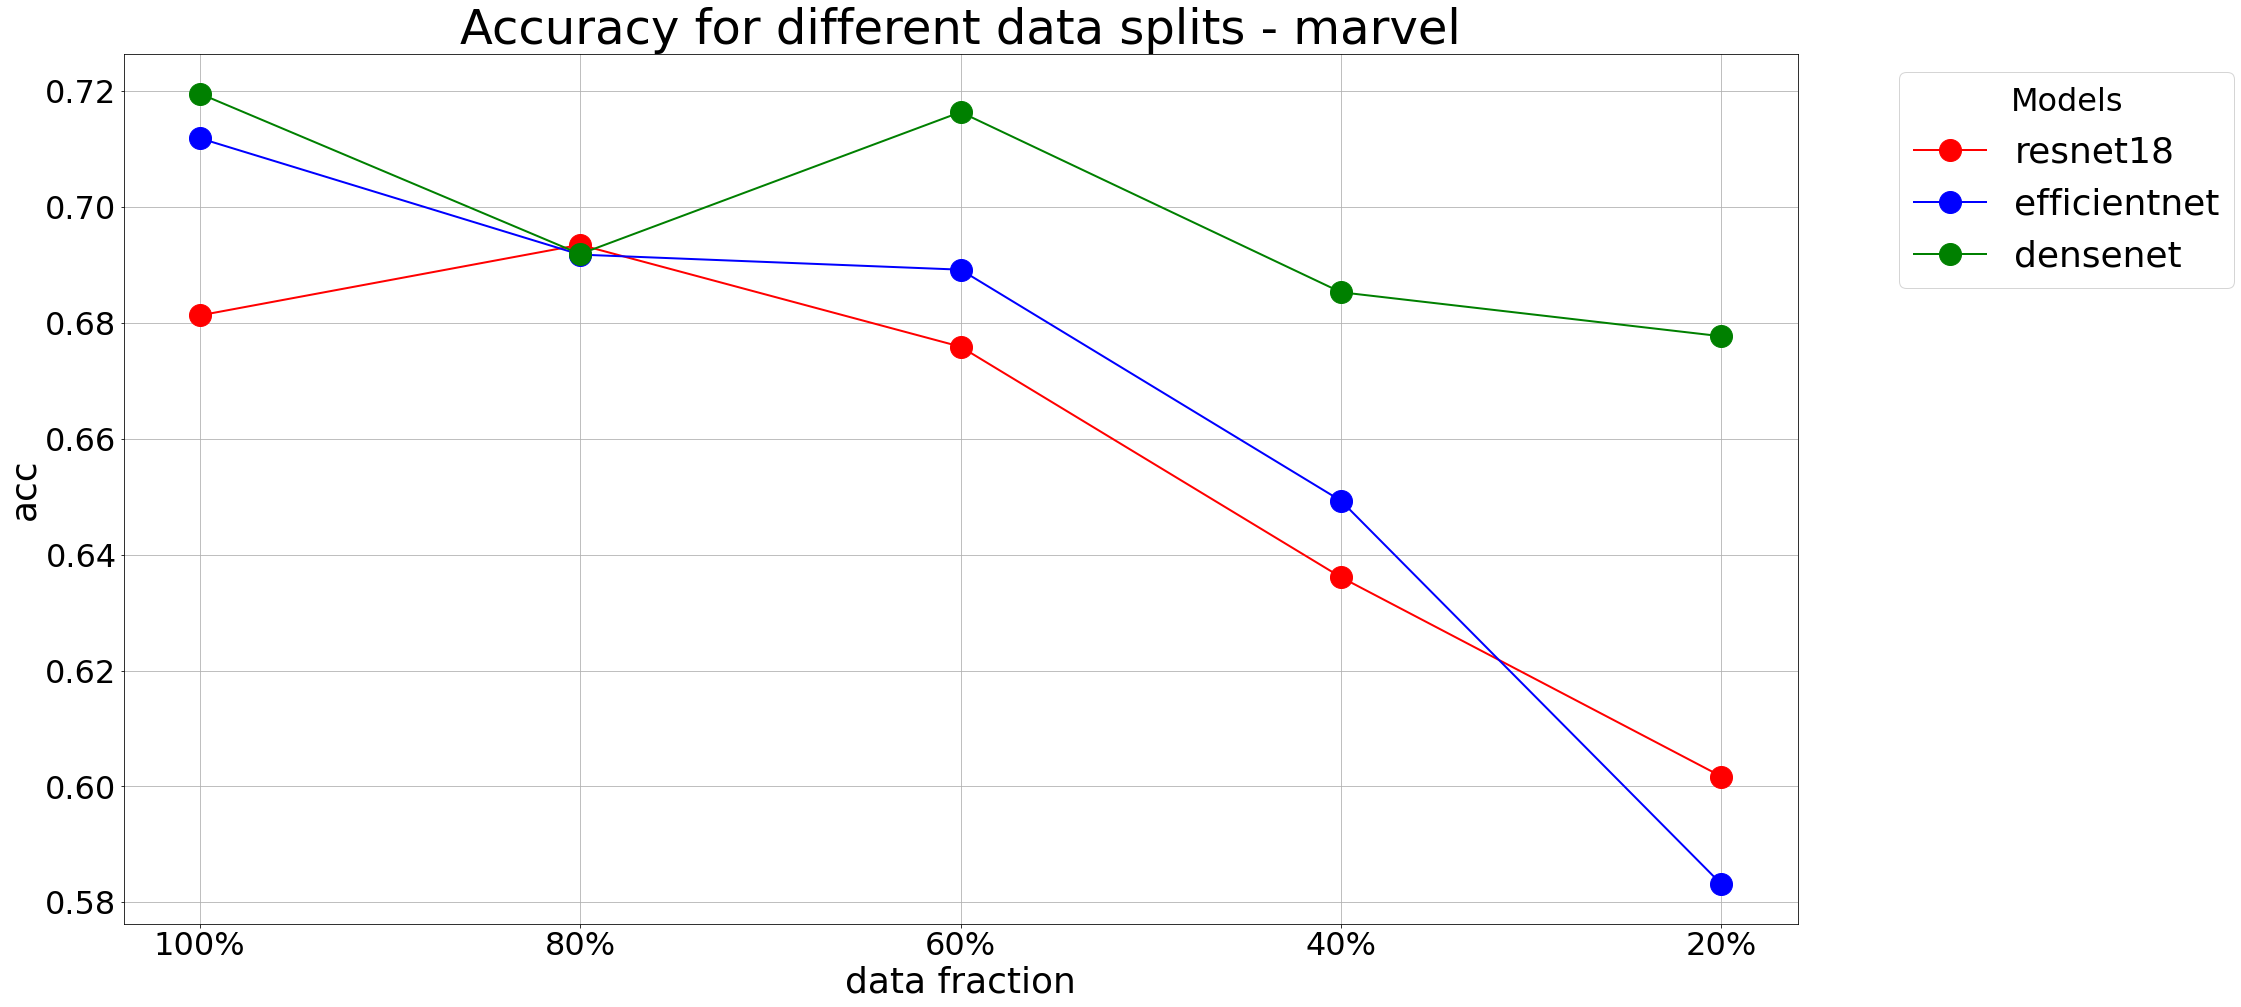

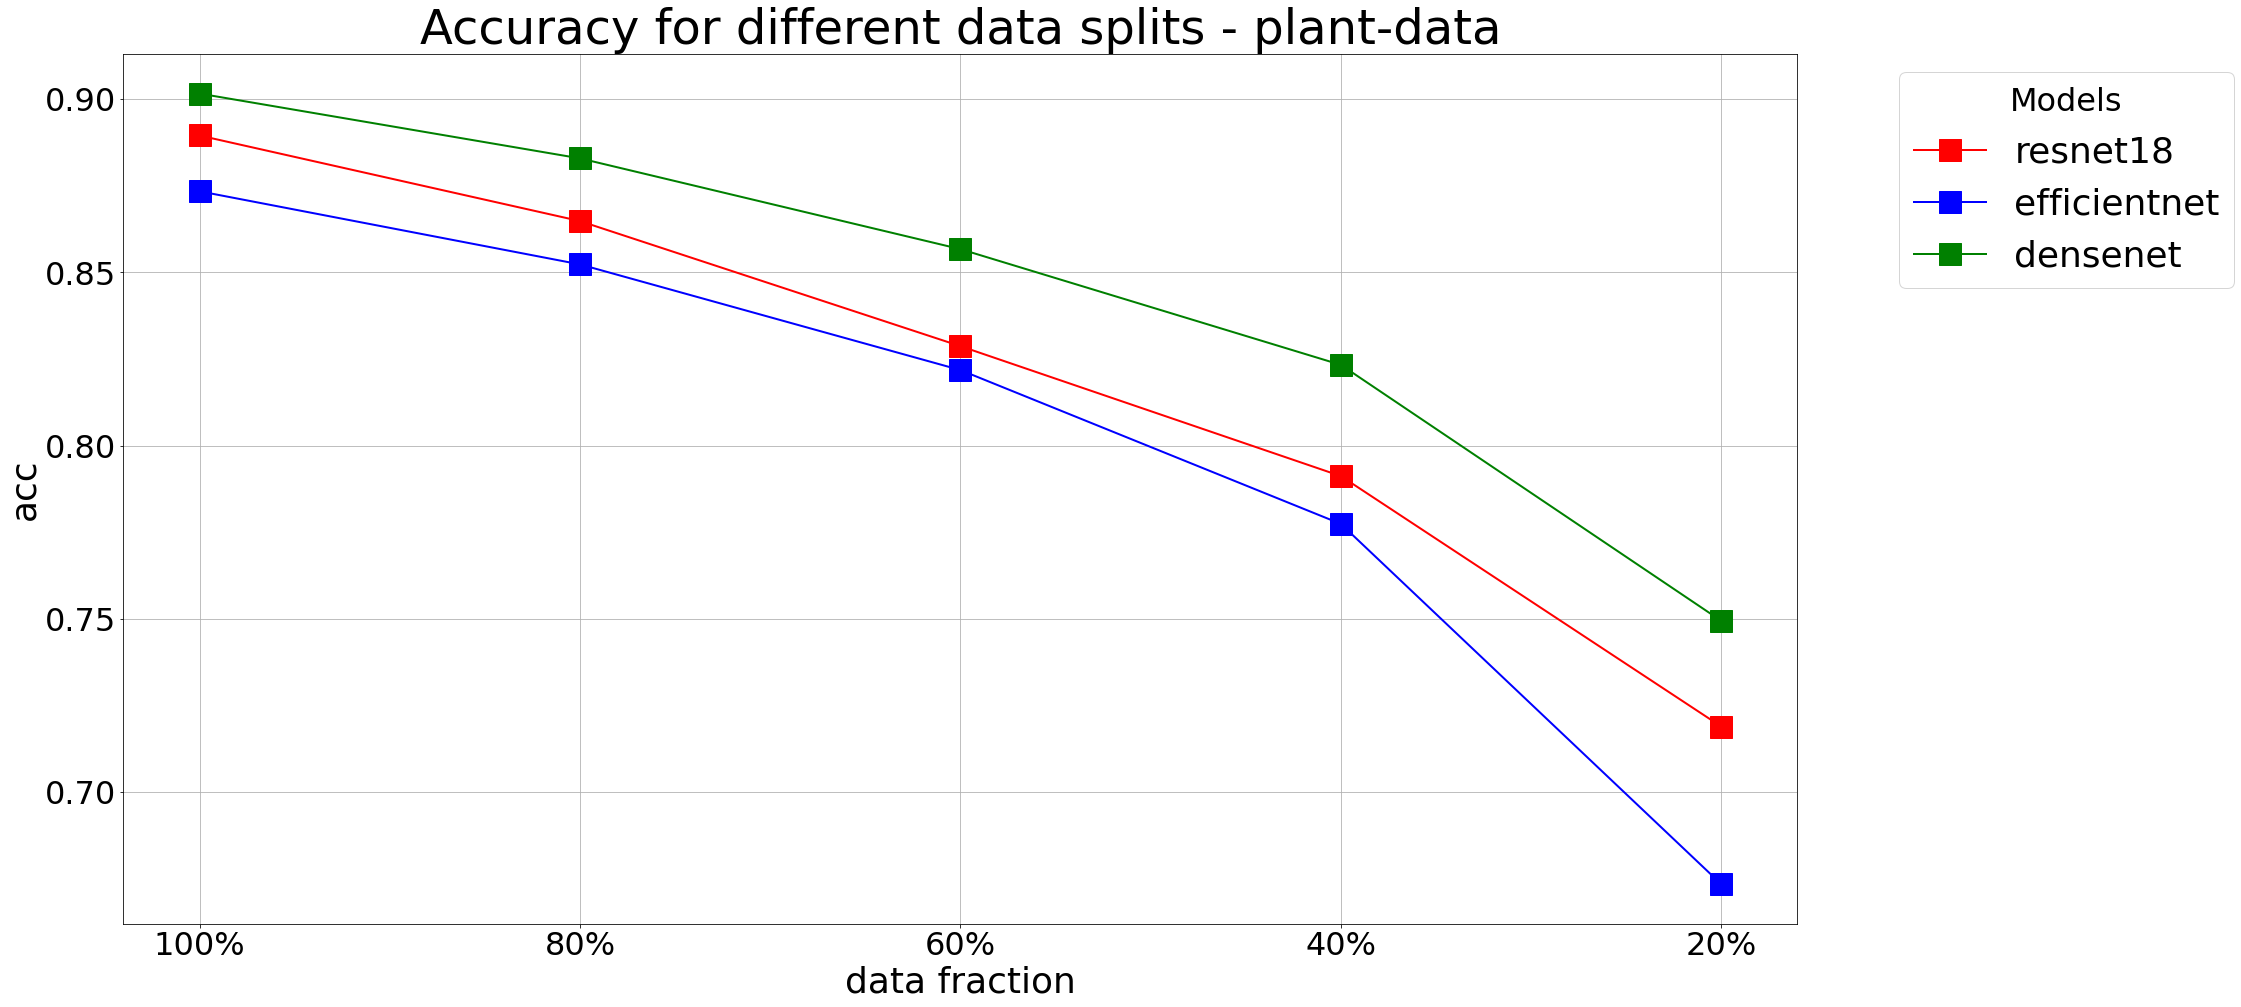

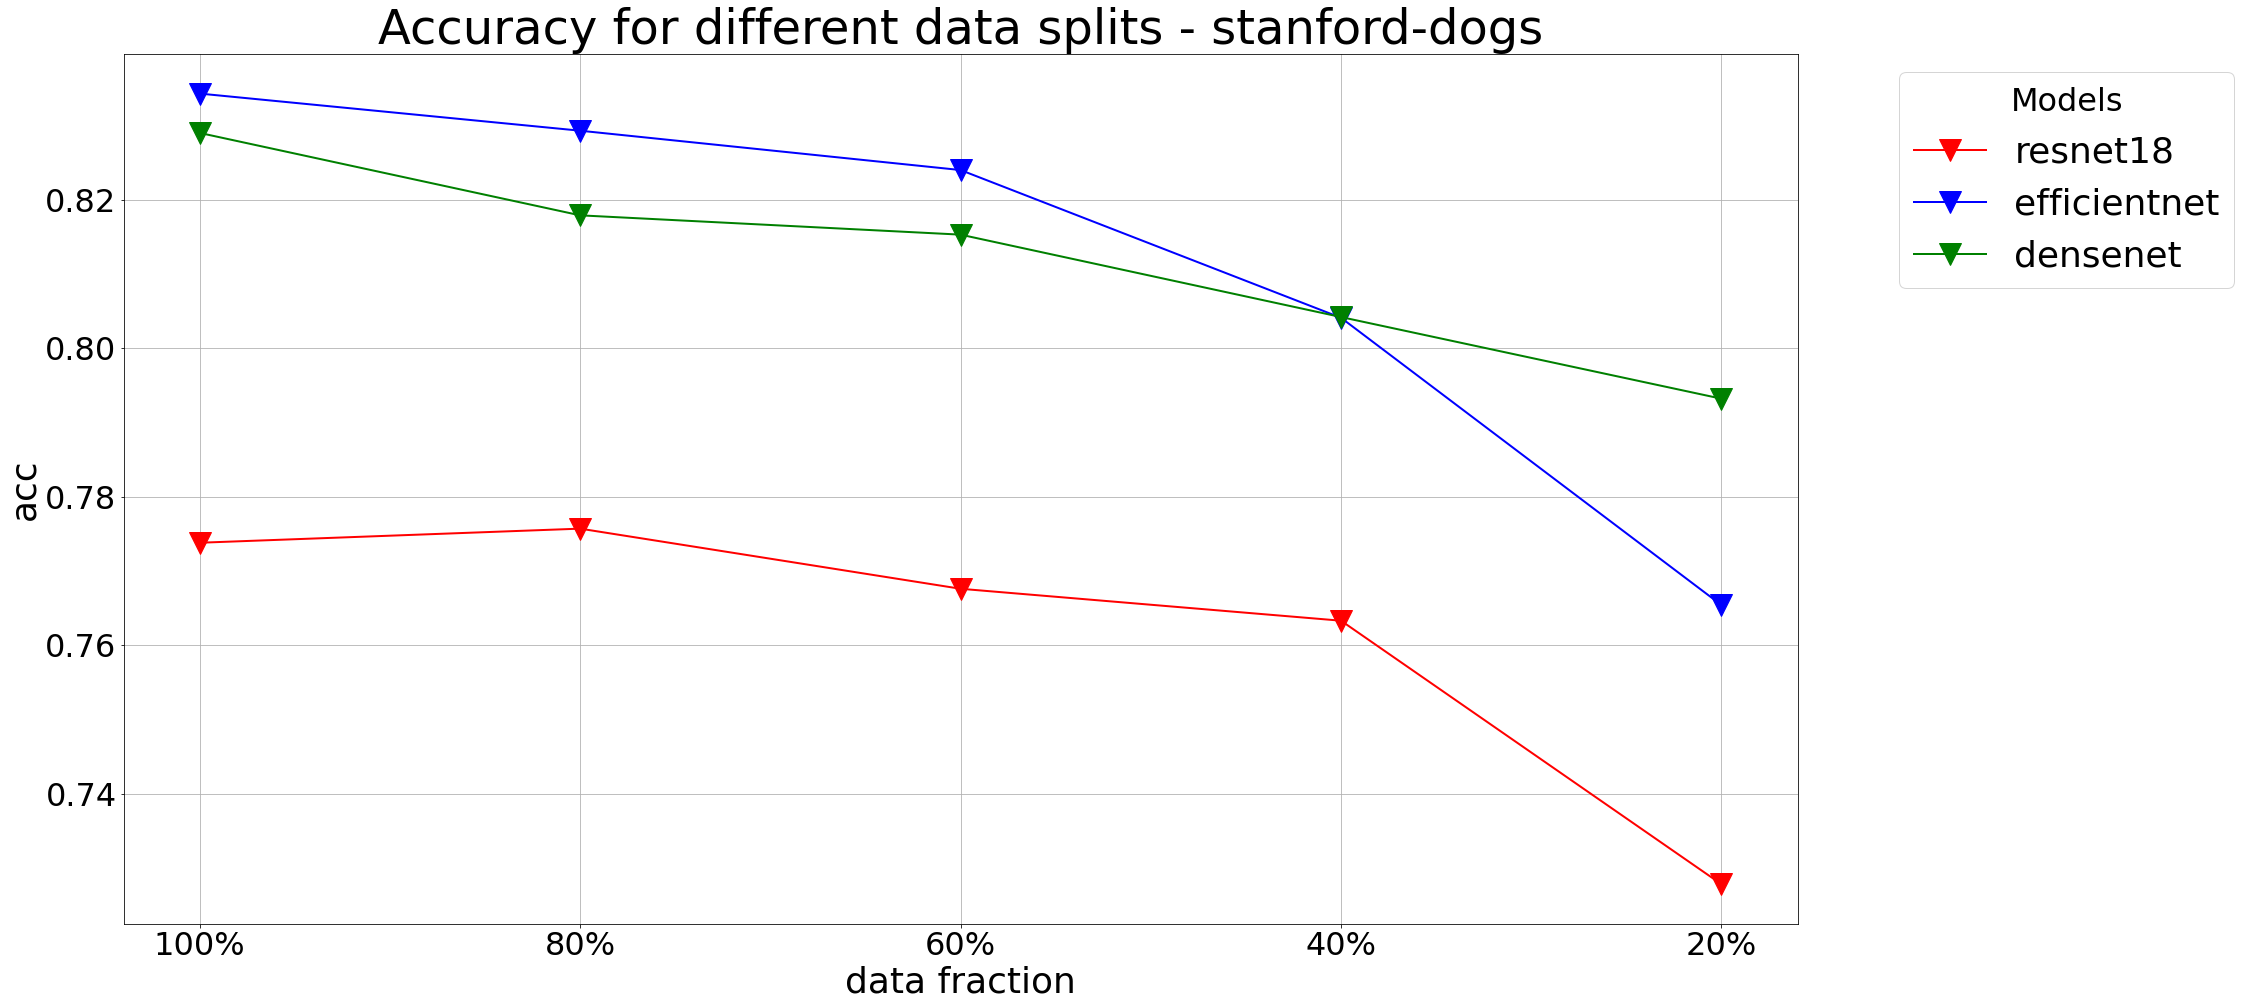

In [40]:
COLORS = {
    "resnet18": "red",
    "efficientnet": "blue",
    "densenet": "green",
}
MARKERS = {
    "edible-plants": "d",
    "food101": "X",
    "marvel": "o",
    "plant-data": "s",
    "stanford-dogs": "v",
} 

for dataset in DATASETS.keys():
    fig = plt.figure(figsize=fig_size)
    for model in MODELS.keys():
        filter_df = scores_df[(scores_df['model'] == model) & (scores_df['dataset'] == dataset)]

        plt.plot(filter_df['data_split'], filter_df['acc'], color=COLORS[model], marker=MARKERS[dataset], label=model, linewidth=2, markersize=marker_size)
    
    plt.title('Accuracy for different data splits - '+dataset, fontsize=title_font)
    plt.xlabel('data fraction', fontsize=label_font)
    plt.ylabel('acc', fontsize=label_font)
    plt.legend( title='Models', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
    plt.grid(True)
    plt.show()
    fig.savefig(f'../prints/{dataset}-accuracy.jpg', bbox_inches='tight')
    fig.savefig(f'../prints/{dataset}-accuracy.png', bbox_inches='tight')


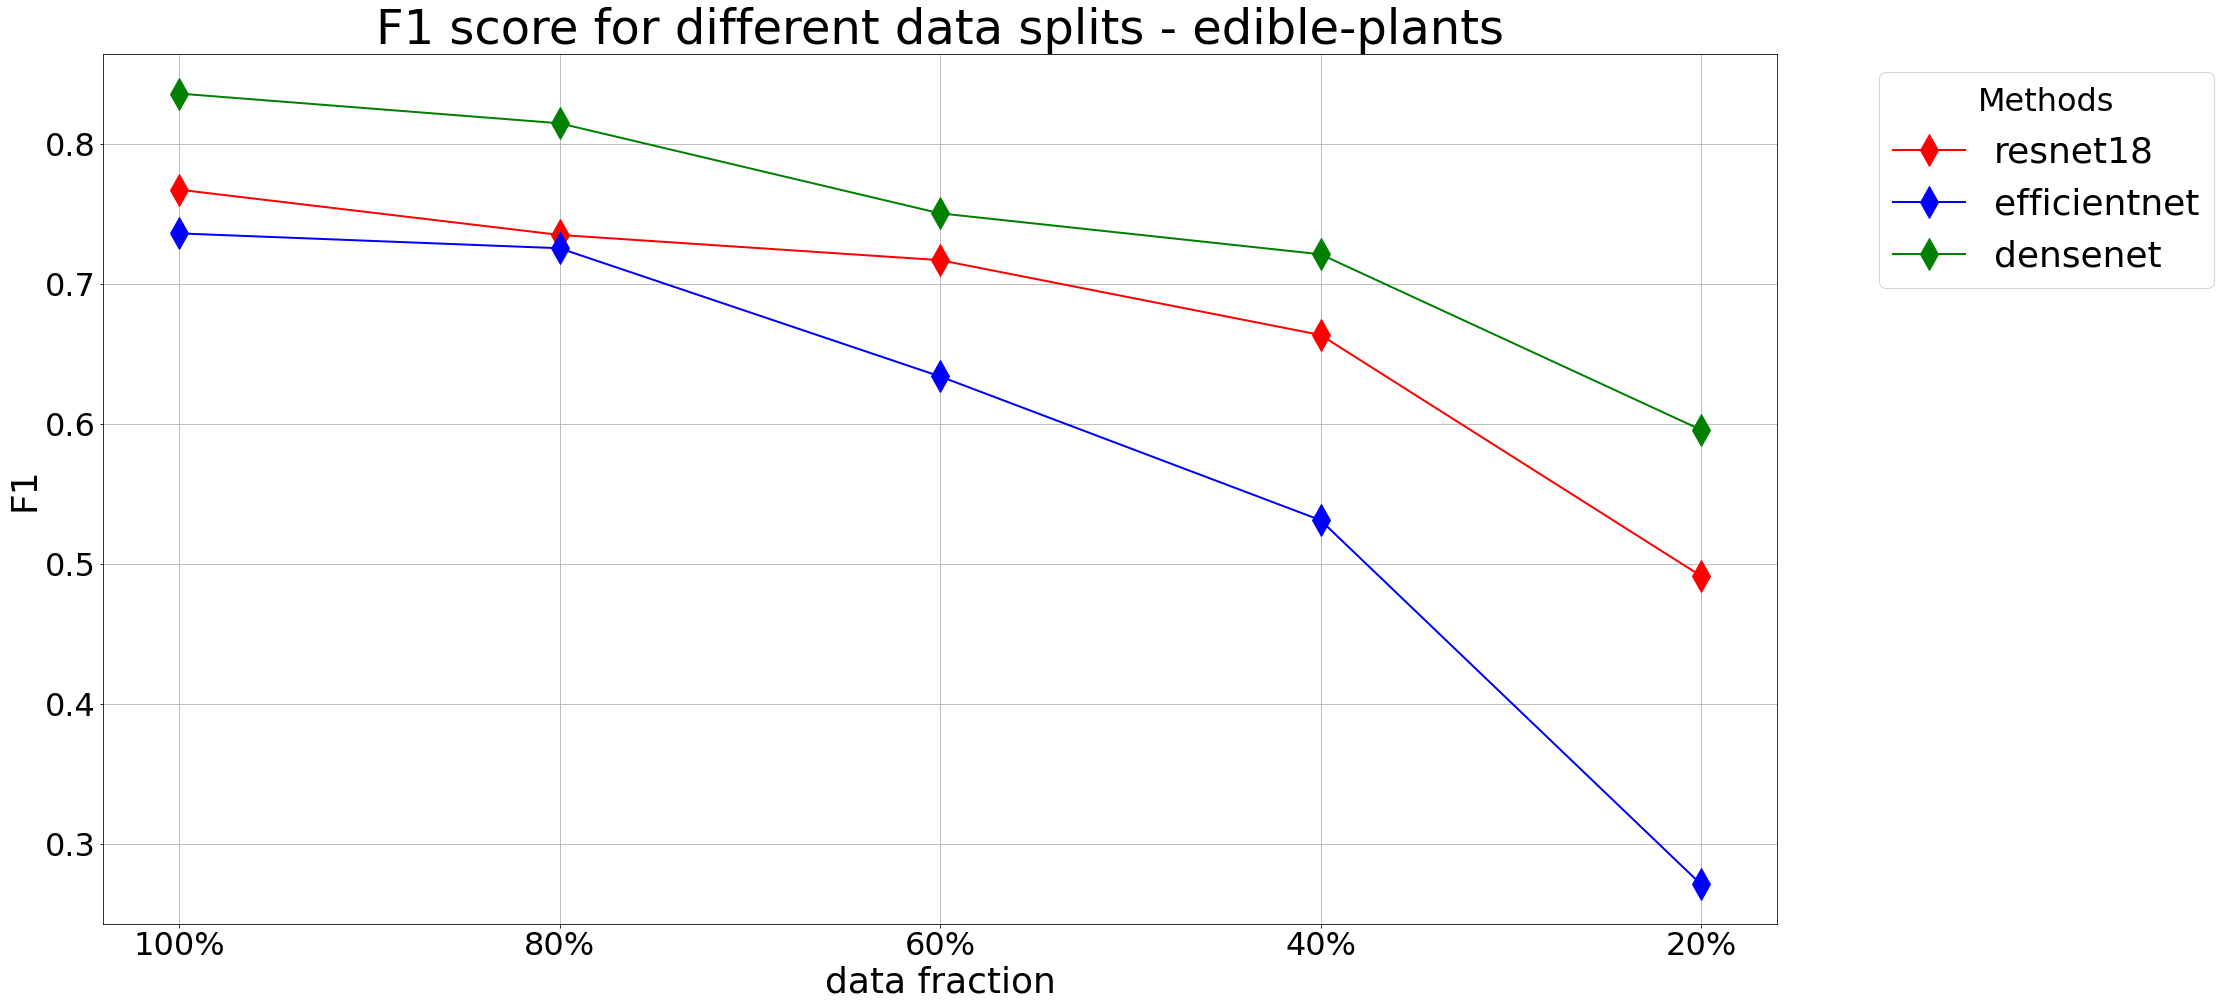

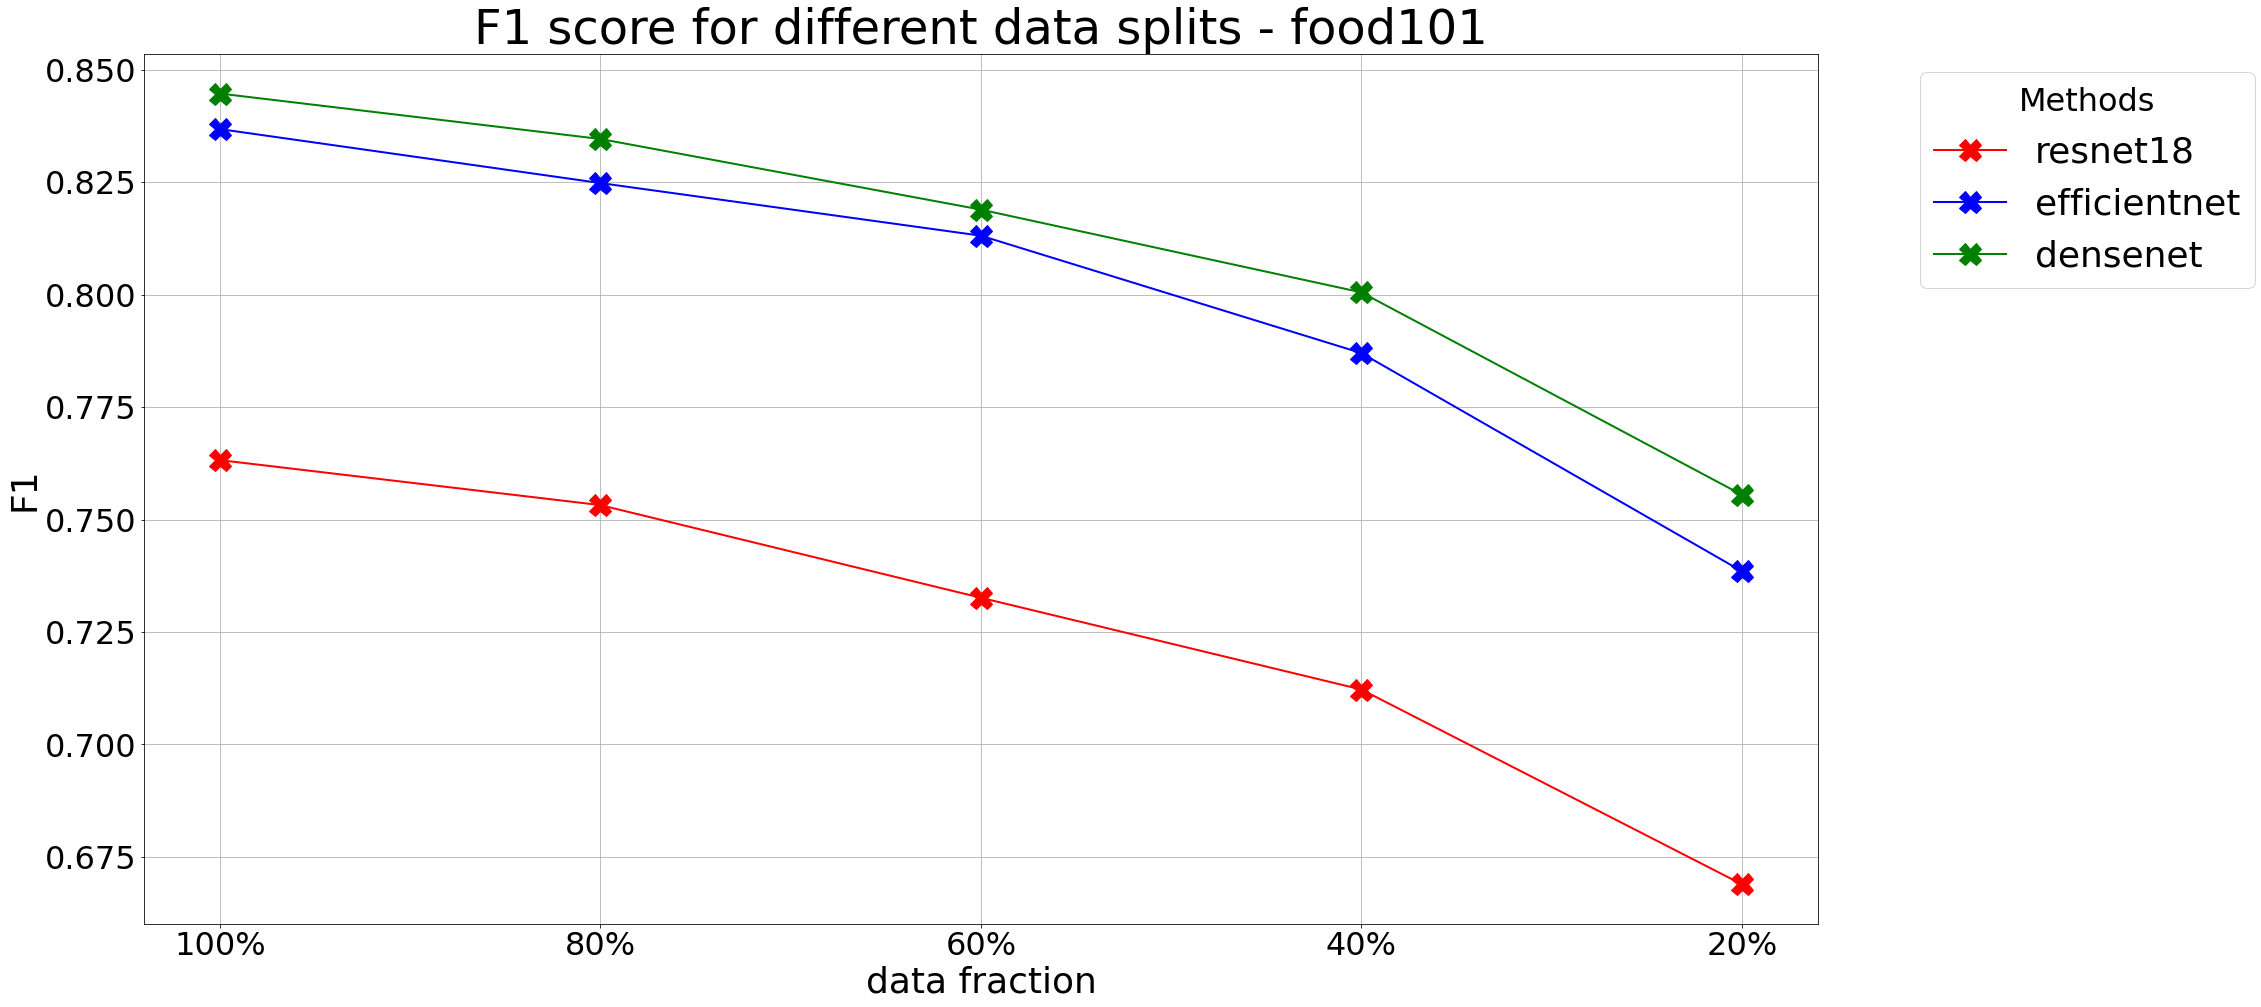

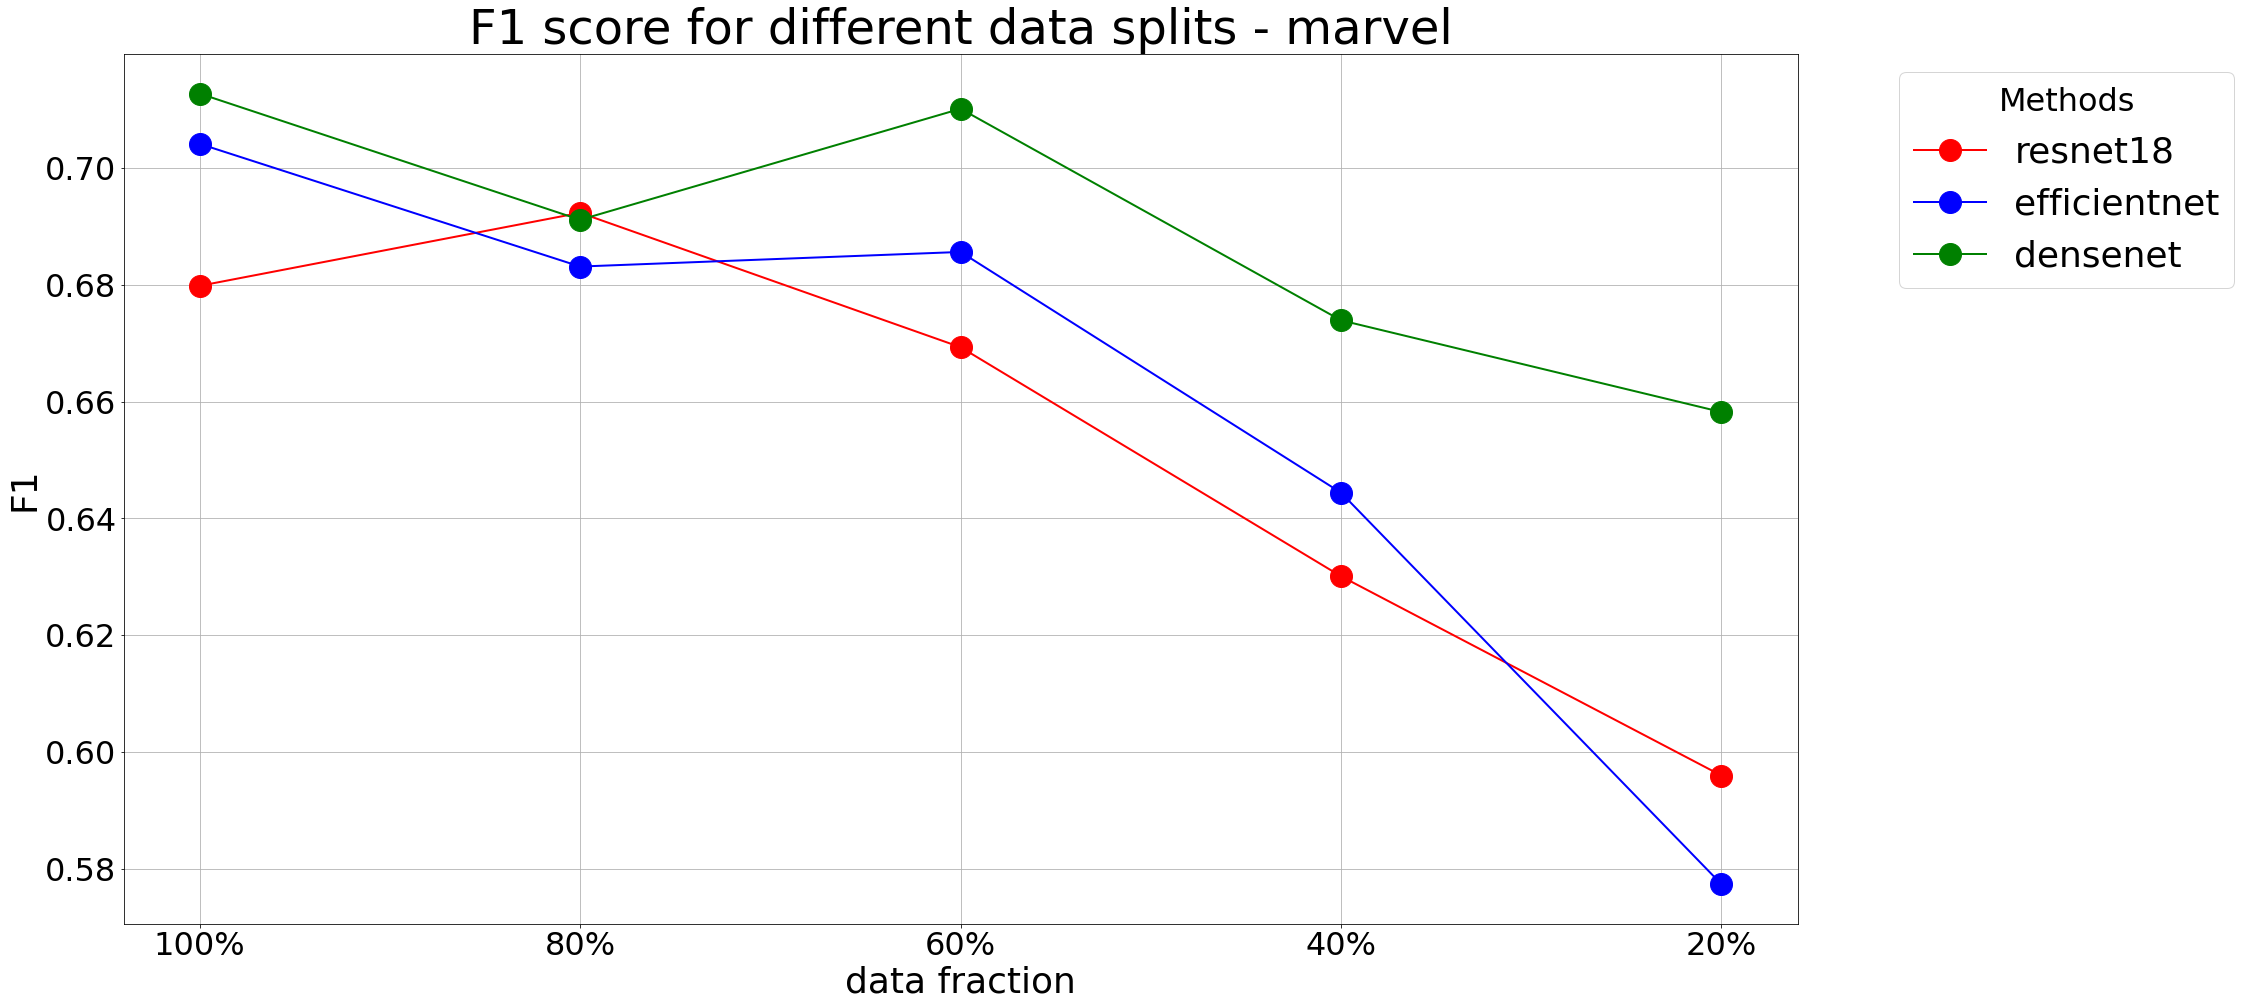

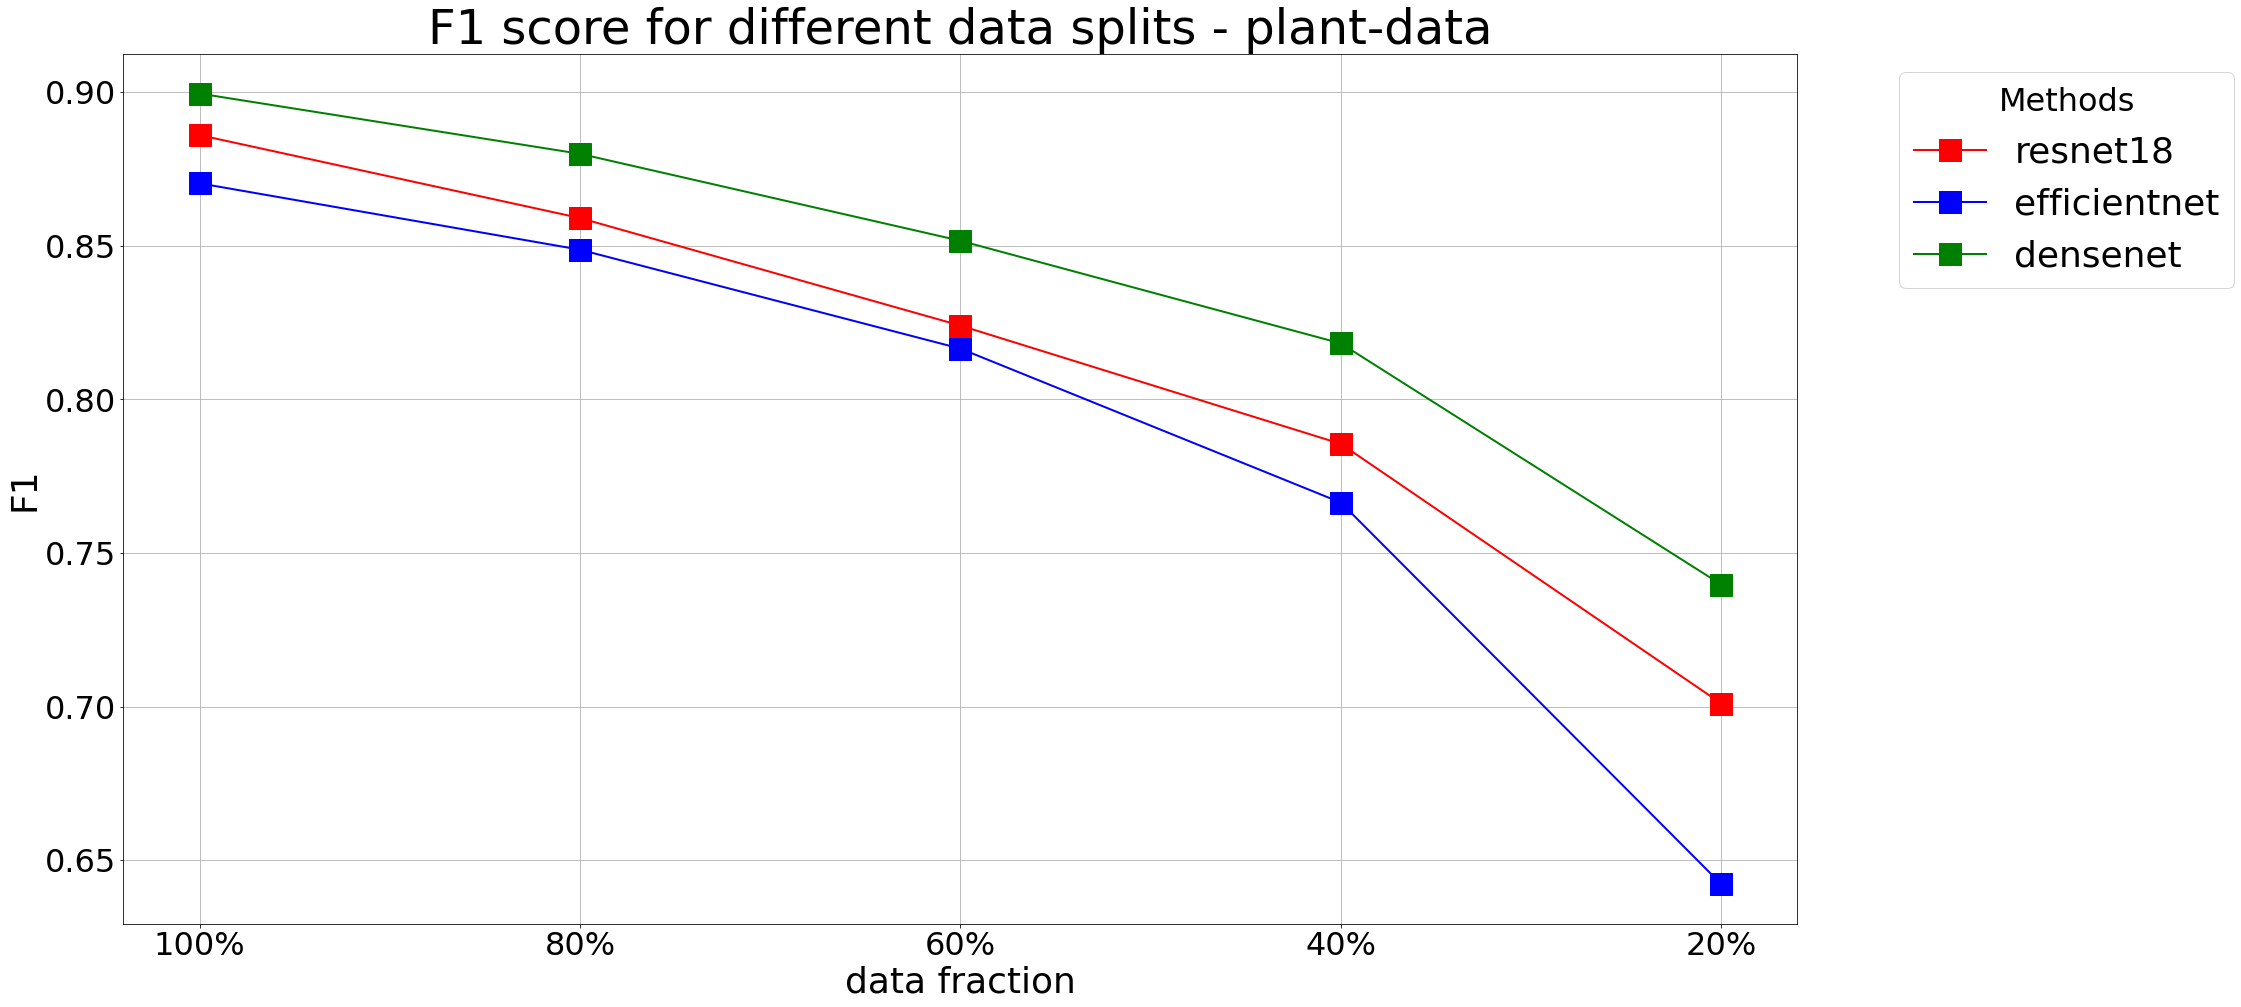

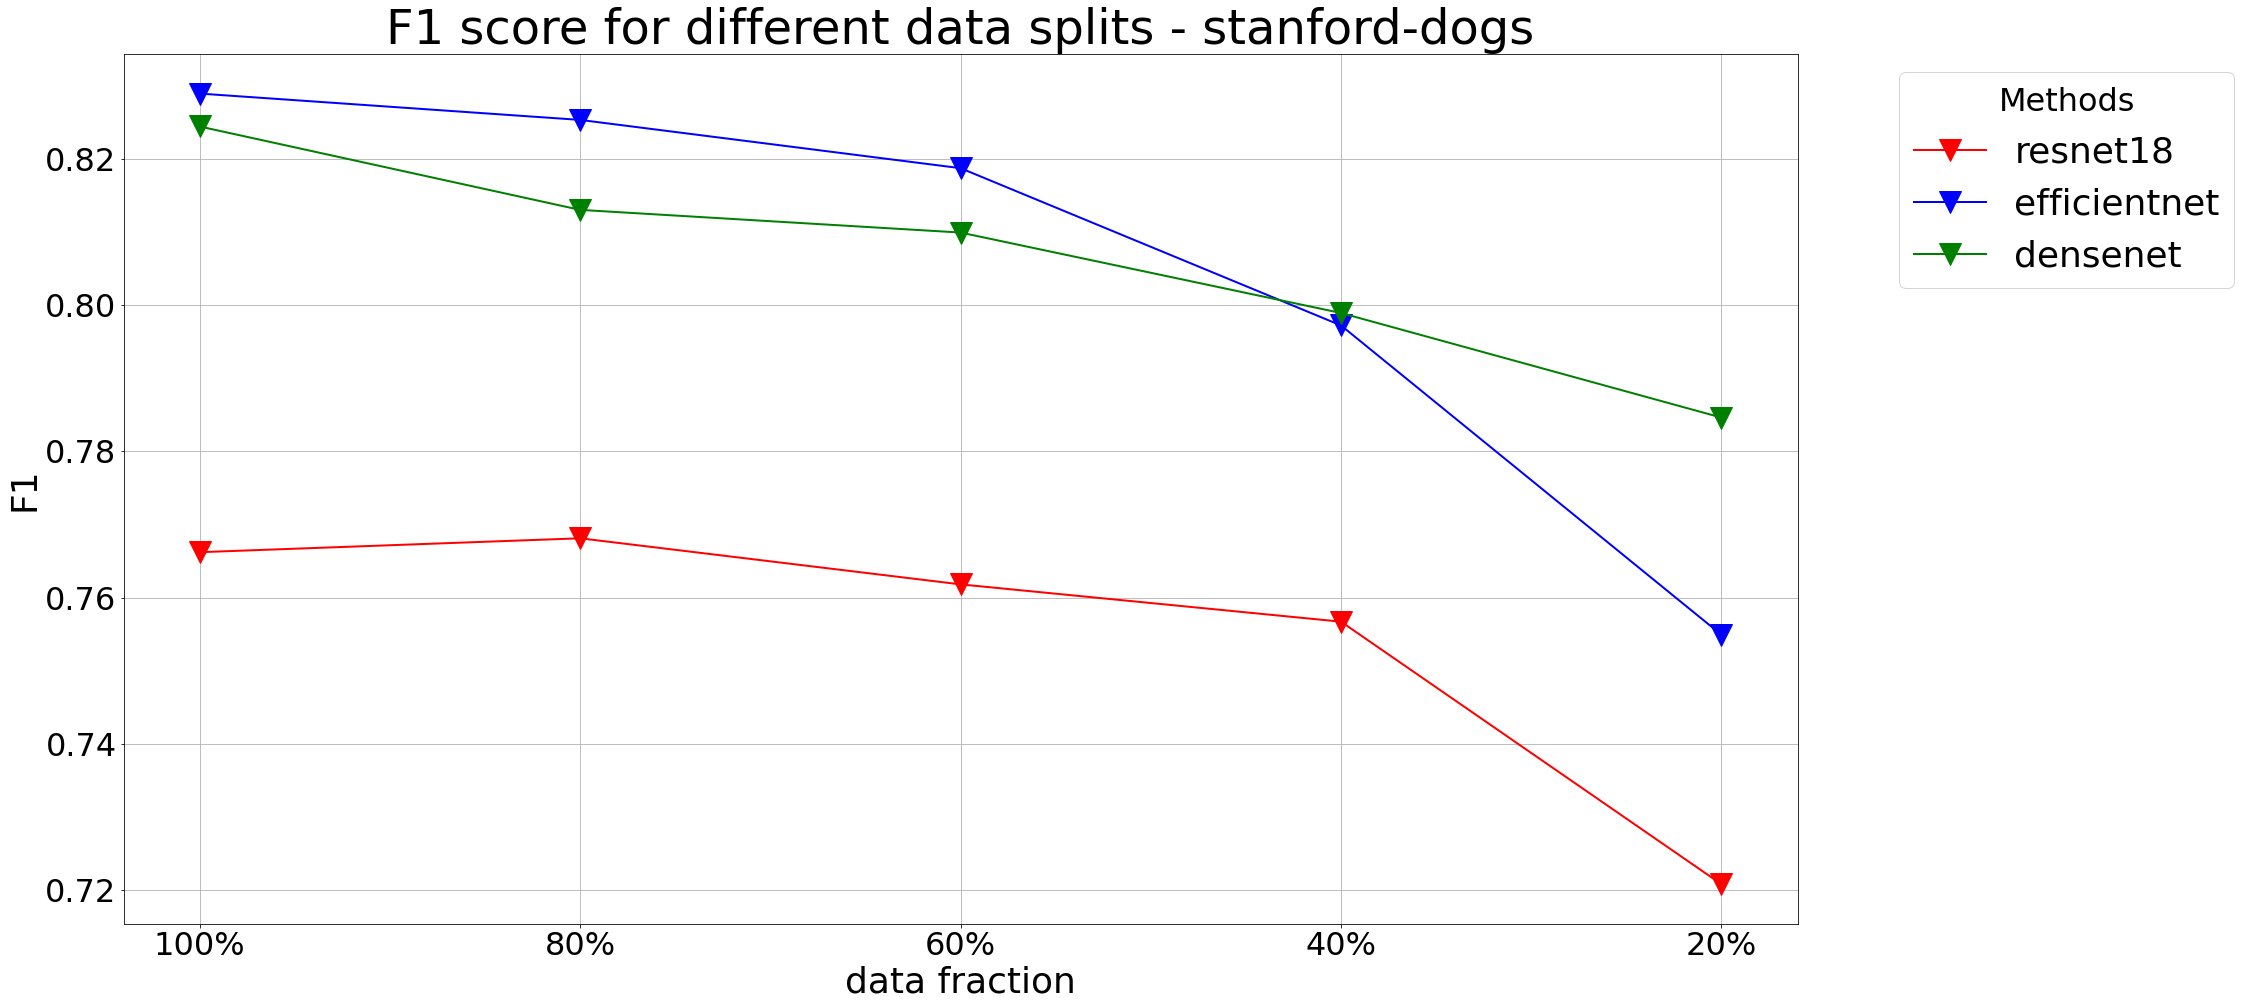

In [41]:

for dataset in DATASETS.keys():
    fig = plt.figure(figsize=fig_size)
    for model in MODELS.keys():
        filter_df = scores_df[(scores_df['model'] == model) & (scores_df['dataset'] == dataset)]

        plt.plot(filter_df['data_split'], filter_df['f1'], color=COLORS[model], marker=MARKERS[dataset], label=model, linewidth=2, markersize=marker_size)
    
    plt.title('F1 score for different data splits - '+dataset, fontsize=title_font)
    plt.xlabel('data fraction', fontsize=label_font)
    plt.ylabel('F1', fontsize=label_font)
    plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
    plt.grid(True)
    plt.show()
    fig.savefig(f'../prints/{dataset}-f1.jpg', bbox_inches='tight')
    fig.savefig(f'../prints/{dataset}-f1.png', bbox_inches='tight')


In [43]:
print(scores_df.to_latex())

\begin{tabular}{llllrr}
\toprule
{} &        dataset &         model & data\_split &     acc &      f1 \\
\midrule
0  &  edible-plants &      resnet18 &       100\% &  0.8146 &  0.7671 \\
1  &  edible-plants &      resnet18 &        80\% &  0.7867 &  0.7348 \\
2  &  edible-plants &      resnet18 &        60\% &  0.7709 &  0.7168 \\
3  &  edible-plants &      resnet18 &        40\% &  0.7411 &  0.6634 \\
4  &  edible-plants &      resnet18 &        20\% &  0.5519 &  0.4914 \\
5  &        food101 &      resnet18 &       100\% &  0.7650 &  0.7632 \\
6  &        food101 &      resnet18 &        80\% &  0.7550 &  0.7532 \\
7  &        food101 &      resnet18 &        60\% &  0.7362 &  0.7326 \\
8  &        food101 &      resnet18 &        40\% &  0.7146 &  0.7122 \\
9  &        food101 &      resnet18 &        20\% &  0.6741 &  0.6689 \\
10 &         marvel &      resnet18 &       100\% &  0.6813 &  0.6798 \\
11 &         marvel &      resnet18 &        80\% &  0.6935 &  0.6923 \\
12 &     